<font color='black'><font size=5>**Introduction:**</font>  
-The data  resume sales transactions of one year of datazone company.It was provide in order to classify each customer to his best categoty from his first purchasing.    
-Cleaning data by treate missing values, outliers...  
-Features engineering.  
-Analyze univariate and analyze multivariate.  
-Dimensionnal reduction.  
-Clustering data.  


<img src="http://www.wisdomrobot.com/wp-content/uploads/2016/10/sales-dial.jpg">

# Importing Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

# Importing Data

In [2]:
data=pd.read_excel('Online Retail.xlsx')

In [3]:
data.head() # Survey in data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Missing values 

In [4]:
#Compute the number of missing values for each column.
table=pd.DataFrame({c: sum(data[c].isna()) for c in data.columns},index=['missing values number'])
table

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
missing values number,0,0,1454,0,0,0,135080,0


<font color='blue'><font size=3>**Description missing values**

In [5]:
#We will define function wich allow us to find the correct values of missing values for this column.
def remp_description(i,df):
    """ This function allow to examinate the value of the Description column of the introduced index row.
     If this value is null, the function examinate the value of the StockCode column of this row. If this 
     value is not null.The function search in the introduced dataframe to find the correct value of the 
     missing value from its StockCode value.
     
     Args:
     i(int):the row number that the function will examinate.
     df(DataFrame): The introduced dataframe
     
     Return:
     description(str):the value of the column Description for the introduced row.
     """
    description=df.iloc[i]['Description'] #recuperate the value of Description of the introduced row.
    if pd.isna(df.iloc[i]['Description']): # if description value is null.
        code=df.iloc[i]['StockCode']       # the value of StockCode of the introduced row.
        if not pd.isna(code):              # if the StockCode value is not null.
            rd=df[df['StockCode']==code]   #data set which StockCode value equal to code.
            for val in rd['Description']:
                if not pd.isnull(val):    #recuperate the first value not null of the Column Stockcode.
                    description=val
                    break
    return description

In [6]:
data['Description']=[remp_description(i,data) for i in range(len(data))] # replace the Description missing values.

In [7]:
sum (data['Description'].isna()) # the number of rest missing value of this column.

112

<font color='blue'><font size=3>**CustomerID missing values **

In [8]:
#we will define function which allow us to find the correct values of missing values for this column.
def remp_CustomerID(df):
    """This function allow to look for each missing CustomerID value the correct value in the neighbor rows,
    which have the same InvoiceNo values.
    
    Args:
    
    df(DataFrame): The introduced dataframe, that the function will examinate.
    """
    dr=df[df['CustomerID'].isna()]
    for i in dr.index:
        vl=df.iloc[i]['InvoiceNo']
        if not pd.isna(vl):
            dff=df.iloc[max(0,i-10):i+10]
            dffr=dff[dff['InvoiceNo']==vl]
            if len(dffr) > 0:
                dfff=dffr[~ dffr['CustomerID'].isna()]
            if len(dfff) > 0:
                df.iloc[i]['CustomerID']= dfff.iloc[dfff.index[0]]['CustomerID']
                    
        

In [9]:
remp_CustomerID(data)

In [10]:
sum(data['CustomerID'].isna())

135080

**We couldn't find any correct value for the CustomerID missing values. So, we will define an id for each CustomerID
missing value correspond to each InvoiceNo value.**

In [11]:
def def_id(df):
    """This function will give a different ID for each CustomerID missing values. It recuperates the dataframe
     which has CustomerID missing values. Then it attribute a new ID correspond to each differents InvoiceNo value.
     
     Args:
     
     df(DataFrame):the introduced dataframe which the function will examinate.
     """
    idd=max(df['CustomerID'])       #The max CustomerID used.
    dr=df[df['CustomerID'].isna()]  # sub dataframe wich all CustomerID missing values are null.
    invoicen=dr['InvoiceNo'].unique() #The uniques InvoiceNo values belong to the dataframe CustomerID missing values.
    id_valeurs={c:vl+i for c,vl,i in zip(invoicen,np.full(len(invoicen),idd),range(1,len(invoicen)+1))} #attribute different CustomerID to each different InvoiceNo.
    for invoice in invoicen:
        nv=df[df['InvoiceNo']==invoice]
        nv['CustomerID']= nv['CustomerID'].fillna(id_valeurs[invoice])
        df[df['InvoiceNo']==invoice]=nv
   

In [12]:
def_id(data) # impute each CustomerID missing values by implente the previous function.

/home/taher/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
sum(data['CustomerID'].isna()) # the number of the rest missing values for the column CustomerID.

0

In [14]:
# Compute the number of rest missing values.
table=pd.DataFrame({c:sum(data[c].isna()) for c in data.columns},index=['missing values number'])
table

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
missing values number,0,0,112,0,0,0,0,0


**We find that the variable Description is not useful for our work . Hence, we will delete this variable.**

In [15]:
del (data['Description'])

# Outliers

**In order to detecte if there were outliers in our variables, we will represent the boxplot of our variables.**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95cea92588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95cea92b70>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f95cea92320>,
 'medians': [<matplotlib.lines.Line2D at 0x7f95ceaa8400>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7f95ceaa8828>,
  <matplotlib.lines.Line2D at 0x7f95c9e09470>]}

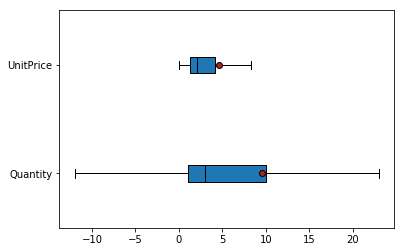

In [16]:
label=['Quantity','UnitPrice']
plt.boxplot([data['Quantity'],data['UnitPrice']],labels=label,vert=False,showfliers=False,\
           medianprops={'color':"black"},patch_artist=True,showmeans=True,\
            meanprops={"marker":"o",'markeredgecolor':'black','markerfacecolor':'firebrick'})

**We notice negatives values of quantity. Hereunder, we will explorate theses values.**

In [17]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


**We find that theses negatives values correspond to cancellation operations,but in somes cases correspond to discounts operations.So we will delete all rows correspond to discounts operation and we save others operation which give us informations about customers who make cancellations.**

In [18]:
data=data.drop((data[(data['Quantity']<0) & (data['StockCode']=='D')]).index)

# Features engineering

<font color='Citron'>**We will define hereunder new features wich allow us to determinate for each customer the periodicity of purchasing,the total amount of his purchasing per year , the recency of his purchasing.We will create variable which allow to indicate if the the customer will make purchasing or not.**</font>

In [19]:
# We will create new variable namely periodicity , which allow to give the periodicity of purchasing of each 
# customer.
data['Periodicity']=[ceil(365/len(data[data['CustomerID']==c])) for c in data['CustomerID']]



In [20]:
#Create a new feature correspond to the total amount purchasing of each customer per year. 

def customer_tot_amount(df):
    """This function allow to compute the total amount of purchasing for each customer.
       
       Args:
       
       df(DataFrame): a data frame that the function will use to compute the amount of each purchasing.
       
       Return:
       df(DataFrame): a data frame with new variable, gives the amount of each purchasing.
    """
    df['prix_total']=df['Quantity'] * df['UnitPrice']
    dfe=df.groupby('InvoiceNo')['prix_total'].sum()
    dff=df.groupby('CustomerID')['prix_total'].sum()
    dff=pd.DataFrame(dff)
    dfe=pd.DataFrame(dfe)
    df['total_amount']=[dff.loc[c]['prix_total'] for c in df['CustomerID']]
    df['purchase_amount']=[dfe.loc[c]['prix_total'] for c in df['InvoiceNo']]
    del(df['prix_total'])
    return df

In [21]:
#define the feature of total_amount and purchase amount.
data=customer_tot_amount(data)

In [22]:
#We will create a new variable which allow to give the time in day from the last purchasing of each customer.
month={'01':0,'02':31,'03':59,'04':80,'05':120,'06':151,'07':181,'08':212,'09':243,'10':273,'11':304,'12':334}
data['n_jour']=[month[str(c)[5:7]] + int(str(c)[8:10]) for c in data['InvoiceDate']]
data['Recency']=[365-max(data[data['CustomerID']==c]['n_jour']) for c in data['CustomerID']]
del(data['n_jour'])

In [23]:
#We will create a new variable namely purchasing which allow t to determinate if the customer will make purchasing or note.
data['purchasing']=[1 if c>0 else 0 for c in data['purchase_amount']]

In [24]:
#We will create a new variable namely threshold_annulation, which will allow us to deteminate the percentage of 
#cancellled order per customer in one year.
dp=data[['InvoiceNo','CustomerID','Periodicity','total_amount','purchase_amount','purchasing']]
dp=dp.drop_duplicates()
def annulation(c):
    """This function allow to compute the percentage of annuled order for the introduced customer, defined by 
       the value of his CustomerID.
       
       Args:
       
       c(int): The CustomerID of the customer.
       
       Returns:
       
       return(float): percentage of cancelled order for the customer who has CustomerID c.
       """
    

    dpp=dp[dp['CustomerID']==c]
    return (len(dpp[dpp['purchasing']==0])/len(dpp))
data['threshold_annulation']=[annulation(c) for c in data['CustomerID']]

# Useless Columns

**We find that the columns Quantity,InvoiceDate,UnitPrice,StockCode,InvoiceNo are useless for our work.So will drop theses columns.**

In [25]:
del(data['InvoiceNo'])
del(data['StockCode'])
del(data['Quantity'])
del(data['InvoiceDate'])
del(data['UnitPrice'])
del(data['Country'])


In [26]:
data.head()

,CustomerID,Periodicity,total_amount,purchase_amount,Recency,purchasing,threshold_annulation
0,17850.0,2,5288.63,139.12,29,1,0.028571
1,17850.0,2,5288.63,139.12,29,1,0.028571
2,17850.0,2,5288.63,139.12,29,1,0.028571
3,17850.0,2,5288.63,139.12,29,1,0.028571
4,17850.0,2,5288.63,139.12,29,1,0.028571


# Rows duplicated

In [27]:
len(data) # length of data before delete the duplicated rows.

541832

In [28]:
data=data.drop_duplicates()

In [29]:
len(data) # length of data after delete the duplicated rows.

25541

In [30]:
data.head() # Preview in data 

,CustomerID,Periodicity,total_amount,purchase_amount,Recency,purchasing,threshold_annulation
0,17850.0,2,5288.63,139.12,29,1,0.028571
7,17850.0,2,5288.63,22.20,29,1,0.028571
9,13047.0,2,3079.10,278.73,30,1,0.444444
21,13047.0,2,3079.10,70.05,30,1,0.444444
25,13047.0,2,3079.10,17.85,30,1,0.444444


In [31]:
data1=data[['CustomerID','Periodicity','total_amount','Recency','threshold_annulation']]
data2=data[['CustomerID','Periodicity','Recency','threshold_annulation','purchase_amount','purchasing']]

In [32]:
data1=data1.drop_duplicates()
data2=data2.drop_duplicates()

# Data Exploration

<font color=blue><font size=3>**Univariate Analyse**</font>

**We will create a histogram for each variable.In the same graph, we give the mean of each variable.**

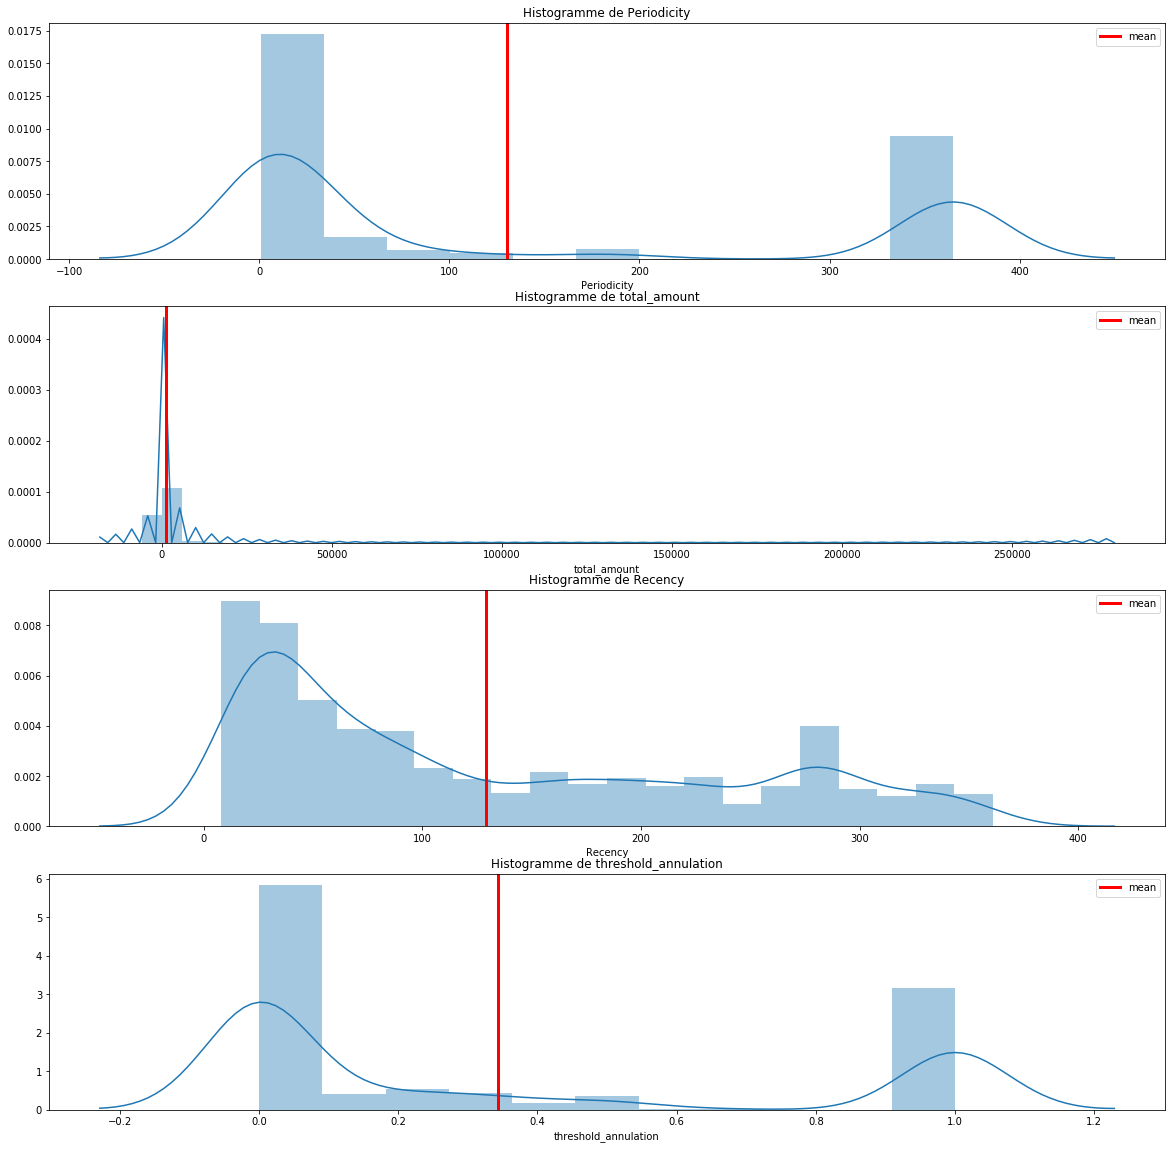

In [33]:
import seaborn as sns 
fig=plt.figure(figsize=(20,20))
for i in range(1,5):
    ax=fig.add_subplot(4,1,i)
    sns.distplot(data1[data1.columns[i]])
    ax.axvline(data1[data1.columns[i]].mean(),color='red',linewidth=3,label='mean')
    plt.title("Histogramme de {}".format(data1.columns[i]))
    plt.legend()

In [34]:
from scipy import stats
tab_stats=pd.DataFrame({c:[data1[c].mean(),data1[c].mode(),data1[c].quantile(0.25),data1[c].quantile(0.75),\
                           data1[c].quantile(0.5)] for c in data1.columns[1:]},index=['mean','mode','Q1','Q3','median'])
tab_stats

,Periodicity,total_amount,Recency,threshold_annulation
mean,130.291,1206.81,129.092,0.343219
mode,0 365 dtype: int64,0 0.0 dtype: float64,0 23 dtype: int64,0 0.0 dtype: float64
Q1,6,0,36,0
Q3,365,1089.08,218.75,1
median,20,298.405,88,0


<font color=citron>**We can conclude that:  
    -The mean periodicity of customer purchasing  is barely 130 days.  
    -50% of customer has a periodicity purchasing less than 20 days.    
    -the mean yearly purchasing  amount of customers is about 1206.**</font>

<font color=blue>**multivariate Analyse **</font>

Text(0.5,1,'Mean amount of one purchasing transaction in function of purchasing periodicity')

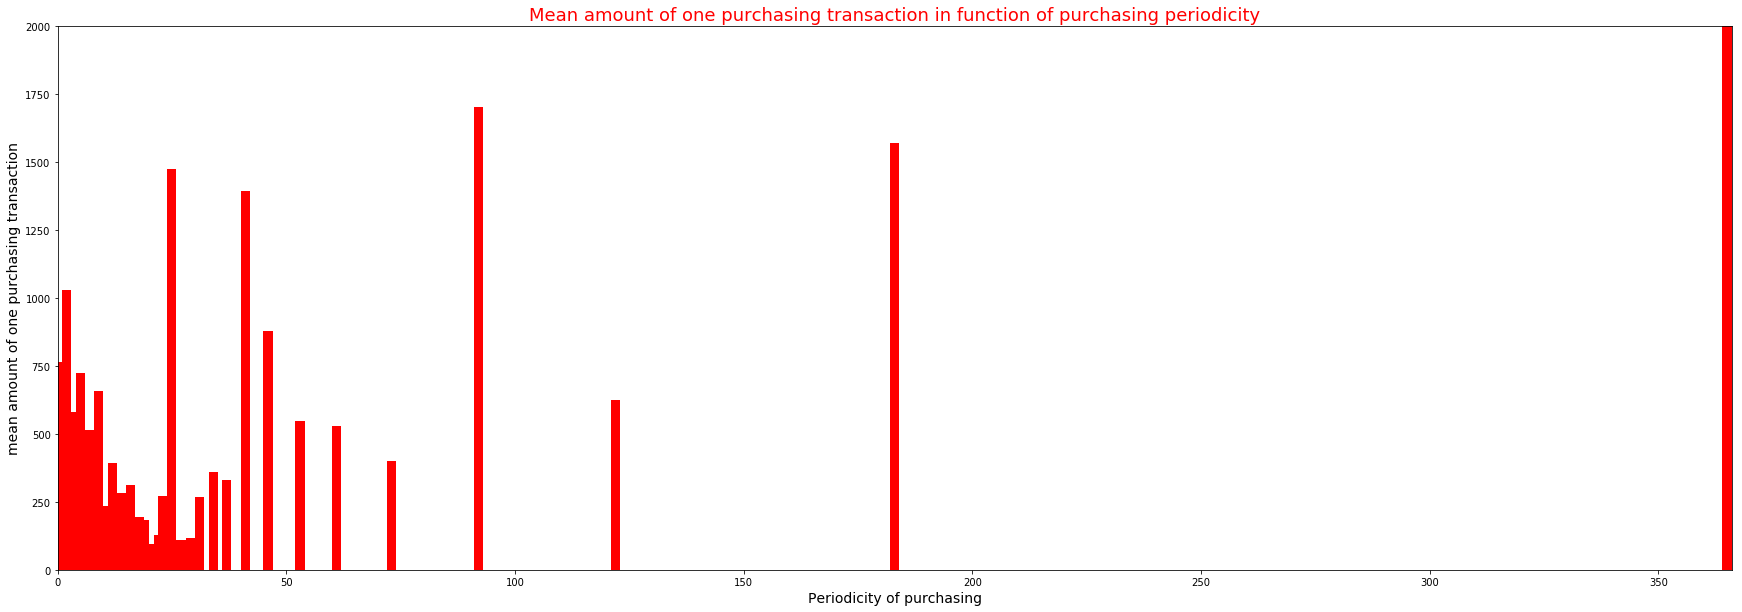

In [35]:
fig=plt.figure(figsize=(30,10))
plt.bar(data['Periodicity'],data['total_amount']*data['Periodicity']/365,width=2,color='red')
plt.xlim([0,366])
plt.ylim([0,2000])
plt.xlabel('Periodicity of purchasing',fontsize=14)
plt.ylabel('mean amount of one purchasing transaction',fontsize=14)
plt.title('Mean amount of one purchasing transaction in function of purchasing periodicity',fontsize=18,color='red')

<font color=citron>**We can conclude from the graph above, that in general the customer who have low frequency of purchasing , they have the highest basket.**</font>

**We will now try to answers the following questions:  
    -If there is correlation between periodicity of customer and achievement of transaction purchasing ?  
    -If there is correlation between the  amount of transaction and achievement of transaction purchasing ?  
    -If there is correlation between the time from the last purchasing and the achievement of transaction purchasing ?**

To answer theses questions, we need to compute the correlation between the variables Periodicity, total_amount and Recency with the variable purchasing.We note that the variable purchasing is a qualitative variable, also for Periodicity and Recency.So we need to create the contingency table of theses variables.We have the variables Recency and periodicity have a lot of possibils values. For this reason, we will create the contingency table of the variable purchasing with  theses variables on base the values of purchasing with values of other variables by range. 

In [38]:
def quartile_range(vl,q1,q2,q3):
    """This function allow to return 4 possibles by comparing the first introduced argument with the rest
       of arguments.
    """
    if vl <= q1:
        return 'Q1'
    elif vl <= q2 :
        return 'Q2'
    elif vl <= q3 :
        return 'Q3'
    else:
        
        return 'Q4'
def cont_table(var1,var2):
    """This function, consist to mesure the correlation between the introduced variables and to give the contingency
       table between them.
       
       Args:
       
       var1(Str): the name of the first variable
       var2(str): the name of the second variable
    """
    Y=var2
    X='{}_range'.format(var1)
    q1=data2[var1].quantile(0.25)
    q2=data2[var1].quantile(0.5)
    q3=data2[var1].quantile(0.75)
    data2[X]=[quartile_range(c,q1,q2,q3) for c in data2[var1]]
    cnt=data2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
    tx=data2[X].value_counts()
    ty=data2[Y].value_counts()
    tx=pd.DataFrame(tx)
    ty=pd.DataFrame(ty)
    tx.columns=['values']
    ty.columns=['values']
    n=len(data2)
    ind=tx.dot(ty.T)/n
    mesure=(cnt-ind)**2/ind
    xin=mesure.sum().sum()
    del(data2[X])
    print(" Mesure of correlation between the variable {} and the variable {} equal to :{}".format(var1,var2,xin))
    sns.heatmap(mesure,annot=True)
    plt.title('Tableau de contingence entre la variable {} et la variable {}'.format(var1,var2),color='b')
    plt.show()

 Mesure of correlation between the variable Periodicity and the variable purchasing equal to :2152.7746209056577


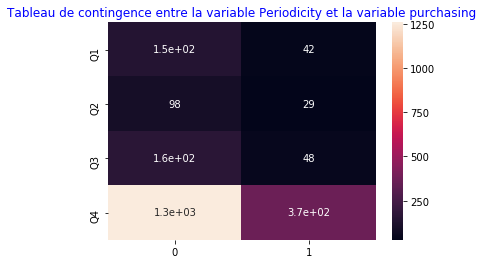

In [39]:
#The contingency table and computing correlation between the variable periodicity and the variable purchasing.
cont_table('Periodicity','purchasing')

 Mesure of correlation between the variable Recency and the variable purchasing equal to :689.2885029424781


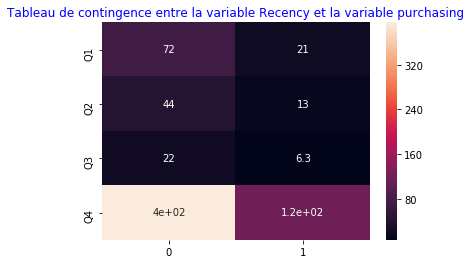

In [40]:
#The contingency table and computing correlation between the variable Recency and the variable purchasing.
cont_table('Recency','purchasing')

 Mesure of correlation between the variable purchase_amount and the variable purchasing equal to :17941.15644358205


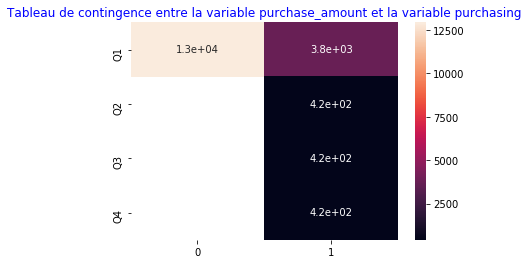

In [41]:
# The contingency table and computing correlation between the variable total_amount and the variable purchasing.
cont_table('purchase_amount','purchasing')

 Mesure of correlation between the variable threshold_annulation and the variable purchasing equal to :6655.191881550158


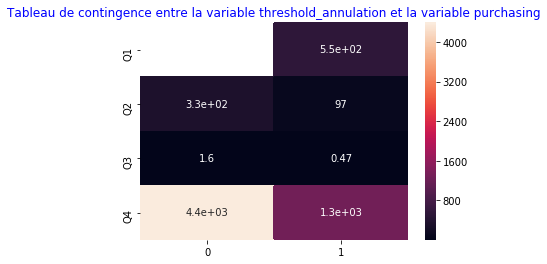

In [42]:
#The contingency table and computing correlation between the variable purchase_amount and the variable purchasing.
cont_table('threshold_annulation','purchasing')

# Dimmensionnal reduction 

In [43]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
df=data1.iloc[:,1:] # data to scaler 

In [46]:
scaled_data=scaler.fit_transform(df) # Scaling data

In [47]:
data_embeded=TSNE(n_components=2).fit_transform(scaled_data) 

Text(0.5,1,'TSNE Reduction')

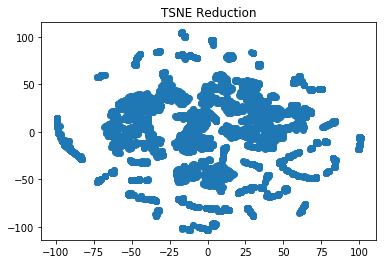

In [48]:
#Visualisation of data reduction 
plt.scatter(data_embeded[:,0],data_embeded[:,1])
plt.title('TSNE Reduction')

# Clustering data

In [49]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

**We will choice to test the KMeans method in order to cluster our data. We will try to find the best number of clusters which we can use and which allow us to optimize the score acuracy.**

In [52]:
df=data1.iloc[:,1:]
n_clusters=[5,6,7,8,9,10,11,12,13,14,15] # the range of cluster number that we will test.
performances={}
for i in n_clusters:
    kmeans=KMeans(i).fit(df)
    labels=kmeans.labels_
    score_silhouette=silhouette_score(df,labels)
    performances[i]=score_silhouette

Text(0.5,1,'The silhouette score en function of number of used clusters')

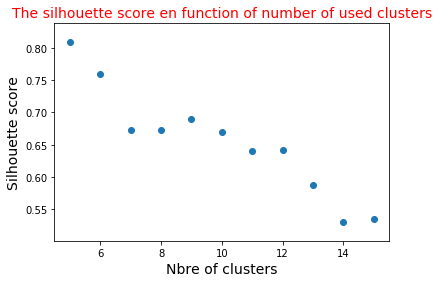

In [53]:
#Visualisation of differetnts tested parametrs
plt.scatter(performances.keys(),performances.values())
plt.xlabel('Nbre of clusters',size=14)
plt.ylabel('Silhouette score',size=14)
plt.title('The silhouette score en function of number of used clusters',size=14,color='red')

So we will choice the number of 9clusters which has the best silhouette score.

In [54]:
kmeans=KMeans(n_clusters=9).fit(df)
labels=kmeans.labels_

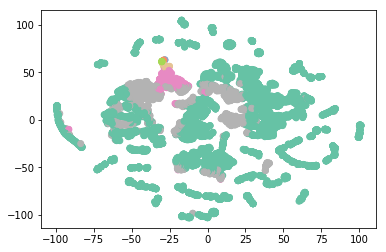

In [55]:
#visualization of our clusters
plt.scatter(data_embeded[:,0],data_embeded[:,1],color=plt.cm.Set2(labels))

# Export data

In [56]:
# We will add the column namely clusters correspond to the label of cluster of each point.
data1['clusters']=labels

In [57]:
data1.head()

,CustomerID,Periodicity,total_amount,Recency,threshold_annulation,clusters
0,17850.0,2,5288.63,29,0.028571,3
9,13047.0,2,3079.10,30,0.444444,7
26,12583.0,2,7187.34,24,0.166667,3
46,13748.0,14,948.25,30,0.000000,0
65,15100.0,61,635.10,15,0.500000,0


In [58]:
data1.to_csv('customer_data.csv')

In [59]:
data2.to_csv('fulfilled_order.csv')